## Upliance.ai Assignment_Submission [Duraiprasanth Sekar]

    Upliance.ai is reshaping the way India cooks with the country’s first AI-powered cooking assistant. Designed for beginners, it simplifies and automates every step of the process, making it easier than ever to cook for yourself. We’re on a mission to redefine home appliances for young India by combining cutting-edge AI technology with everyday convenience. Partnering with industry leaders like OpenAI, we take pride in building innovative and practical solutions that bring a little magic into the kitchen.

    This analysis explores how user demographics—like age and location—impact key metrics such as revenue, session ratings, and engagement. By uncovering spending patterns and identifying high-performing groups, we aim to provide actionable insights to boost customer satisfaction and drive growth.

## Data Cleaning and Preprocessing

In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openpyxl 
import seaborn as sns

In [2]:
#importing the file

up_data = pd.read_excel("D:\\Upliance.ai\\Data Analyst Intern Assignment - Excel.xlsx", engine ='openpyxl')

sheet_names = pd.ExcelFile("D:\\Upliance.ai\\Data Analyst Intern Assignment - Excel.xlsx").sheet_names
print("Sheet Names:", sheet_names)

Sheet Names: ['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']


In [3]:
order_details = pd.read_excel("D:\\Upliance.ai\\Data Analyst Intern Assignment - Excel.xlsx", sheet_name = "OrderDetails.csv")

print("Order Details:") 
order_details.head(2)

Order Details:


,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002


In [4]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      16 non-null     int64         
 1   User ID       16 non-null     object        
 2   Order Date    16 non-null     datetime64[ns]
 3   Meal Type     16 non-null     object        
 4   Dish Name     16 non-null     object        
 5   Order Status  16 non-null     object        
 6   Amount (USD)  16 non-null     float64       
 7   Time of Day   16 non-null     object        
 8   Rating        14 non-null     float64       
 9   Session ID    16 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.4+ KB


In [5]:
order_details.describe()

,Order ID,Order Date,Amount (USD),Rating
count,16.000000,16,16.000000,14.000000
mean,1008.500000,2024-12-04 12:00:00,11.250000,4.285714
min,1001.000000,2024-12-01 00:00:00,7.000000,4.000000
25%,1004.750000,2024-12-02 18:00:00,9.000000,4.000000
50%,1008.500000,2024-12-04 12:00:00,11.500000,4.000000
75%,1012.250000,2024-12-06 06:00:00,13.125000,4.750000
max,1016.000000,2024-12-08 00:00:00,15.000000,5.000000
std,4.760952,NaN,2.435843,0.468807


In [6]:
cooking_sessions = pd.read_excel("D:\\Upliance.ai\\Data Analyst Intern Assignment - Excel.xlsx", sheet_name = "CookingSessions.csv")
print("Cooking Sessions:")
cooking_sessions.head(2)

Cooking Sessions:


,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0


In [7]:
cooking_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Session ID       16 non-null     object        
 1   User ID          16 non-null     object        
 2   Dish Name        16 non-null     object        
 3   Meal Type        16 non-null     object        
 4   Session Start    16 non-null     datetime64[ns]
 5   Session End      16 non-null     datetime64[ns]
 6   Duration (mins)  16 non-null     int64         
 7   Session Rating   16 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 1.1+ KB


In [8]:
user_details = pd.read_excel("D:\\Upliance.ai\\Data Analyst Intern Assignment - Excel.xlsx", sheet_name = "UserDetails.csv")
print("User Details:")
user_details.head(2)

User Details:


,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8


In [9]:
user_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 848.0+ bytes


## Data cleaning and merging

In [10]:
print(user_details.duplicated().sum())
print(cooking_sessions.duplicated().sum())
print(order_details.duplicated().sum())


0
0
0


In [11]:
# Check for missing values
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())
# since rating is only having null values, it can be neglected

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [12]:
# Replacing the User ID to avoid confusions while merging because both order and user details have same USER ID
order_details.rename(columns={'User ID': 'Order_User_ID'}, inplace=True)
user_details.rename(columns={'User ID': 'User_User_ID'}, inplace=True)

In [13]:
# merging the datsets
merged_data = pd.merge(cooking_sessions, order_details, on = "Session ID", how="left")
merged_df = pd.merge(merged_data, user_details, left_on = "User ID", right_on = "User_User_ID", how = "left")

merged_df.head(2)

,Session ID,User ID,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order_User_ID,...,Rating,User_User_ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,U001,...,5.0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,U002,...,4.0,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8


In [14]:
merged_df.drop(columns=['User_User_ID'], inplace=True)
merged_df.head(2)


,Session ID,User ID,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order_User_ID,...,Time of Day,Rating,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,U001,...,Night,5.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,U002,...,Day,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8


## Data Analysis

In [15]:
# visualizing columns for further analysis

merged_df.columns

Index(['Session ID', 'User ID', 'Dish Name_x', 'Meal Type_x', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating', 'Order ID',
       'Order_User_ID', 'Order Date', 'Meal Type_y', 'Dish Name_y',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'User Name',
       'Age', 'Location', 'Registration Date', 'Phone', 'Email',
       'Favorite Meal', 'Total Orders'],
      dtype='object')

### 1.Analyzing the relationship between cooking sessions and user orders

In [16]:
# discovering relationship between session and orders
session_analysis = merged_df.groupby("Session ID").agg({
    "Duration (mins)": "mean",  
    "Amount (USD)": "sum",      
    "Order_User_ID": "count"   
}).reset_index().sort_values(by="Duration (mins)")


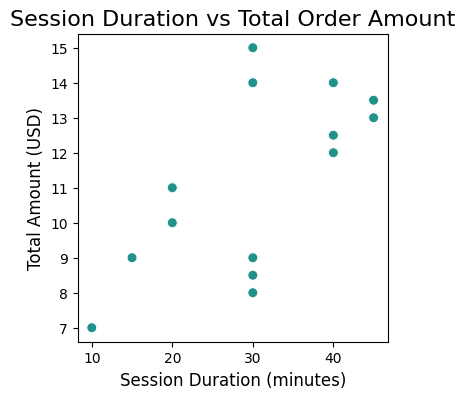

In [17]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=session_analysis, x="Duration (mins)", y="Amount (USD)", hue="Order_User_ID", palette="viridis", size="Order_User_ID", sizes=(50, 300), legend=None)

# Adding labels and title
plt.title('Session Duration vs Total Order Amount', fontsize=16)
plt.xlabel('Session Duration (minutes)', fontsize=12)
plt.ylabel('Total Amount (USD)', fontsize=12)

# Show the plot
plt.show()

### 

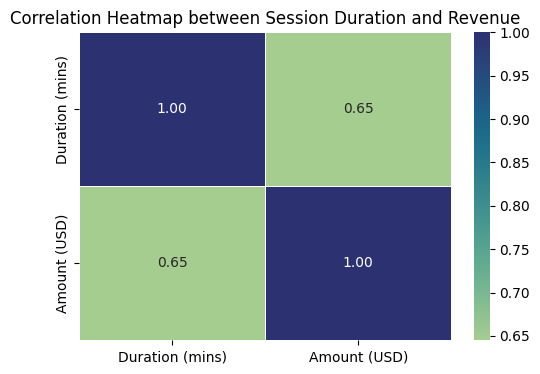

In [18]:
# Calculating Correlation
corr_matrix = session_analysis[["Duration (mins)", "Amount (USD)"]].corr()
# Extracting correlation value
correlation = corr_matrix.loc["Duration (mins)", "Amount (USD)"]
# Plotting Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="crest", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap between Session Duration and Revenue")
plt.show()

INSIGHTS

#### Longer sessions (e.g., 40 mins) tend to generate higher revenue, with a moderate positive correlation of 0.645.
     -- A 40-minute session (S003) generated $12.5, while a 15-minute session (S005) generated $9.0.
     
#### Revenue Efficiency: Shorter sessions often have higher revenue per minute. 
    -- For example, (S005) achieved $0.60 per minute compared to S003 at $0.31 per minute.

    -- There may be an opportunity to encourage longer session durations to maximize revenue.
    
###### Optimize session scheduling by focusing on balancing session duration and dish complexity to maximize revenue efficiency.

### 2. Identifying Popular Dishes

In [19]:
# uncovering popular dishes
popular_dishes = merged_df.groupby("Dish Name_y").agg({
    "Order_User_ID": "count",   
    "Amount (USD)": "sum"       
}).sort_values(by="Order_User_ID", ascending=False).reset_index()

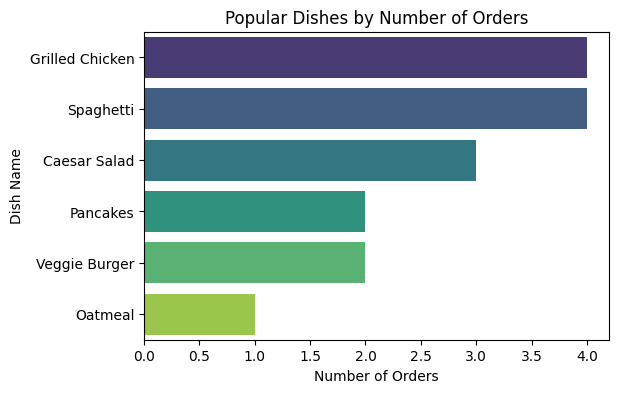

In [20]:
# Plot Most Popular Dishes
plt.figure(figsize=(6, 4))
sns.barplot(data=popular_dishes, x="Order_User_ID", y="Dish Name_y", palette="viridis", hue="Dish Name_y")
plt.title("Popular Dishes by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Dish Name")
plt.show()

In [21]:
# Analysis of dishes based on ratings
dish_rating_analysis = merged_df.groupby("Meal Type_y").agg({
    "Order_User_ID": "nunique",   
    "Amount (USD)": "sum",        
    "Rating": "mean"              
}).reset_index().sort_values(by="Amount (USD)", ascending=False)

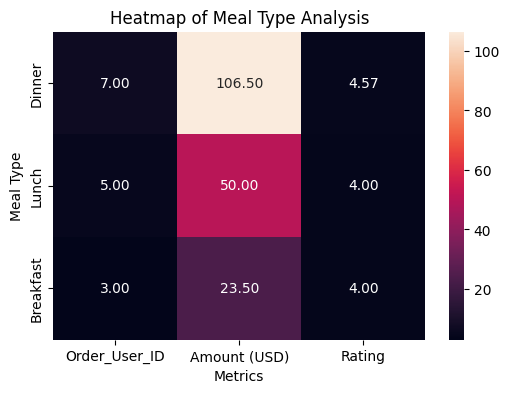

In [22]:
# Heatmap for visualizing relationships
plt.figure(figsize=(6, 4))
sns.heatmap(dish_rating_analysis.set_index("Meal Type_y")[["Order_User_ID", "Amount (USD)", "Rating"]], annot=True, cmap="rocket", fmt=".2f")
plt.title("Heatmap of Meal Type Analysis")
plt.xlabel("Metrics")
plt.ylabel("Meal Type")
plt.show()

Insights

### From this we can see that Spaghetti and Grilled Chicken are the most ordered dishes 
      -- Spaghetti has generated more revenue when compared to Grilled chicken 
      -- Grilled chicken is rated as the highest (user satisfaction)  when compared to spaghetti
      
### Revenue by dishes
      -- Spaghetti: Average revenue per session = $13.5
    -- Grilled Chicken: Average revenue per session = $12.8
      -- Caesar Salad: Average revenue per session = $9.33
  
### Promote dishes like Spaghetti and Grilled Chicken during longer cooking sessions and upsell to boost revenue.


#### Meal Type
     -- Dinner orders generate the highest revenue ($106.5) with the best user rating (4.57), indicating a high satisfaction for premium meals. 
     -- Lunch and breakfast, with moderate revenue and similar ratings (4.00), could benefit from value-oriented offerings and bundling to increase order size and satisfaction. 

### 3. Exploring demographic factors that influence user behavior.

In [23]:
# Average order amount and rating by location and age
demographic_analysis = merged_df.groupby(['Age', 'Location']).agg({
    'Amount (USD)': 'mean',        
    'Session Rating': 'mean',      
    'Order_User_ID': 'count'     
}).reset_index()


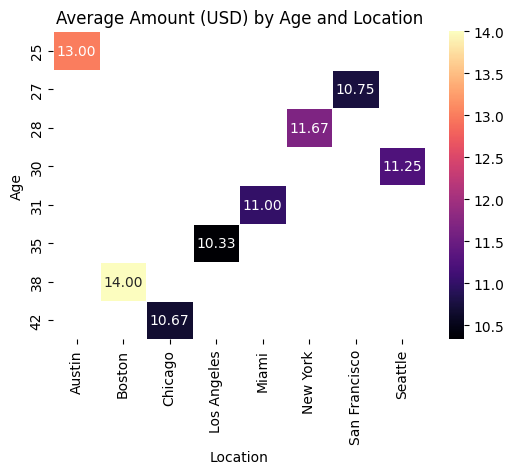

In [24]:
# Pivot the data for visualization
pivot_data = demographic_analysis.pivot_table(
    index='Age', 
    columns='Location', 
    values='Amount (USD)', 
    aggfunc='mean'
)

# Create a heatmap to visualize the average amount spent by Age and Location
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_data, annot=True, cmap="magma", fmt=".2f", linewidths=0.5)
plt.title("Average Amount (USD) by Age and Location")
plt.show()

INSIGHTS 

#### Demographic Based Ratings
        -- Users aged 38 in Boston generated the highest average revenue ($14.00) with a perfect session rating (5.0),
            followed by 25-year-olds in   Austin ($13.00 and a 4.8 rating).
        -- Younger users (25–30 years) showed higher engagement in cities like New York and Austin, while older users (38 years) demonstrated premium spending behavior in Boston.

In [25]:
# 5. Insights and Recommendations
print("\n=== Insights ===")
print()
print(f"1. Correlation between session duration and revenue: {correlation:.2f}")
print()
print("2. Top 5 popular dishes by number of orders:")
print(popular_dishes.head(5))
print()
print("3.(i) Locations with the highest average revenue:")
print(demographic_analysis.head(5))



=== Insights ===

1. Correlation between session duration and revenue: 0.65

2. Top 5 popular dishes by number of orders:
       Dish Name_y  Order_User_ID  Amount (USD)
0  Grilled Chicken              4          51.0
1        Spaghetti              4          55.5
2     Caesar Salad              3          28.0
3         Pancakes              2          16.5
4    Veggie Burger              2          22.0

3.(i) Locations with the highest average revenue:
   Age       Location  Amount (USD)  Session Rating  Order_User_ID
0   25         Austin     13.000000        4.800000              1
1   27  San Francisco     10.750000        4.700000              2
2   28       New York     11.666667        4.533333              3
3   30        Seattle     11.250000        4.500000              2
4   31          Miami     11.000000        4.300000              1


In [26]:
# Recommendations
print("\n=== Recommendations ===")
print("1. Focus on promoting dishes like those (Spaghetti, Grilled chicken) in the top popular dishes list.")
print("2. Analyze sessions with higher revenue efficiency to optimize cooking durations.")
print("3. Focus on promoting premium services in Boston for older users and enhancing engagement activities for younger demographics in vibrant cities like Austin and New York.")


=== Recommendations ===
1. Focus on promoting dishes like those (Spaghetti, Grilled chicken) in the top popular dishes list.
2. Analyze sessions with higher revenue efficiency to optimize cooking durations.
3. Focus on promoting premium services in Boston for older users and enhancing engagement activities for younger demographics in vibrant cities like Austin and New York.
